🔹 Summary Statistics:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000    

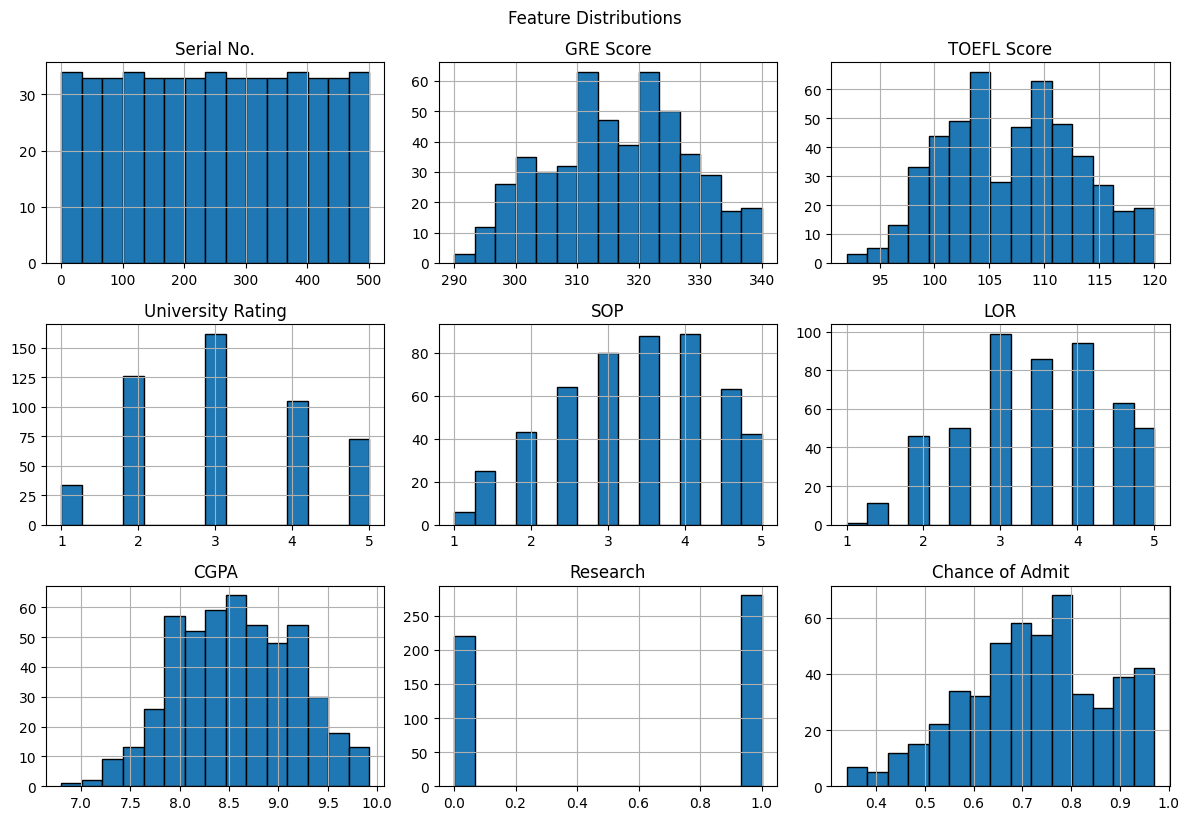


🔹 Missing Values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.87      0.96      0.92        28

    accuracy                           0.95       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100

🔹 Confusion Matrix:
[[68  4]
 [ 1 27]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("sampleadd.csv")

# -------------------------------------------
# a) Summary Statistics
# -------------------------------------------
print("🔹 Summary Statistics:")
print(df.describe())

print("\n🔹 Extra Statistics:")
print("Range:\n", df.max() - df.min())
print("Variance:\n", df.var())
print("Standard Deviation:\n", df.std())
print("25th, 50th, 75th Percentiles:\n", df.quantile([0.25, 0.5, 0.75]))

# -------------------------------------------
# b) Histograms
# -------------------------------------------
df.hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# -------------------------------------------
# c) Data Cleaning, Integration, Transformation
# -------------------------------------------

# Check for missing values
print("\n🔹 Missing Values:\n", df.isnull().sum())

# Drop Serial No. if not needed for prediction
df.drop('Serial No.', axis=1, inplace=True)

# Convert Chance of Admit to classification problem (e.g., Admit >= 0.8 → 1, else 0)
df['Admit'] = (df['Chance of Admit'] >= 0.8).astype(int)
df.drop('Chance of Admit', axis=1, inplace=True)

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Admit', axis=1))
y = df['Admit']

# -------------------------------------------
# d) Model Building (Logistic Regression)
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
